# 10.3 Resampling Plans

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
leukemia = pd.read_csv("../data/leukemia_big.csv")

In [4]:
leukemia.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.15,AML.16,AML.17,AML.18,AML.19,AML.20,AML.21,AML.22,AML.23,AML.24
0,-1.533622,-0.867610,-0.433172,-1.671903,-1.187689,-1.127234,-1.045409,-0.106917,-1.198796,-1.190899,...,-0.436650,-1.274708,-0.681458,-0.876610,-0.624022,-0.431628,-1.435259,-0.671954,-1.013161,-0.969482
1,-1.235673,-1.275501,-1.184492,-1.596424,-1.335256,-1.113730,-0.800880,-0.745177,-0.849312,-1.190899,...,-0.915483,-1.354363,-0.653559,-1.096250,-1.066594,-1.335256,-1.204586,-0.751457,-0.889592,-1.080988
2,-0.333983,0.375927,-0.459196,-1.422571,-0.797493,-1.362768,-0.671954,-1.175674,0.320813,0.646610,...,-0.736156,-0.022153,-0.037455,-0.567335,-1.100749,-0.552938,-0.948874,-0.231657,-0.742163,-0.779500
3,0.488702,0.444011,0.436264,0.193353,0.235632,-0.360312,0.184941,0.425653,0.333983,0.235270,...,0.083781,0.356562,0.416241,0.533986,0.227505,0.416816,0.408202,0.326556,0.361813,0.298864
4,-1.300893,-1.229660,-1.325882,-1.818329,-1.311206,-1.513975,-1.651624,-1.339555,-0.593132,0.133302,...,-1.547444,-1.264475,-1.512318,-1.469583,-1.283472,-0.977672,-1.090178,-1.545120,-1.174272,-1.443183


In [5]:
all_cols = [x for x in leukemia.columns if x.startswith("ALL")]
aml_cols = [x for x in leukemia.columns if x.startswith("AML")]

all_vals = leukemia[all_cols].iloc[135].values
aml_vals = leukemia[aml_cols].iloc[135].values

### Figure 10.4

Difference in medians

In [6]:
mediff_est = (np.median(aml_vals) - np.median(all_vals))
mediff_est.round(3)

0.235

Bootstrap values

In [7]:
n_all = all_vals.shape[0]
n_aml = aml_vals.shape[0]

n_boots = 500
bootvals = []
for _ in range(n_boots):
    aml_boot = np.random.choice(aml_vals, size=n_aml, replace=True)
    all_boot = np.random.choice(all_vals, size=n_all, replace=True)
    bootvals.append(np.median(aml_boot) - np.median(all_boot))

Standard error

In [8]:
np.sqrt(np.var(bootvals, ddof=1)).round(3)

0.072

Plot

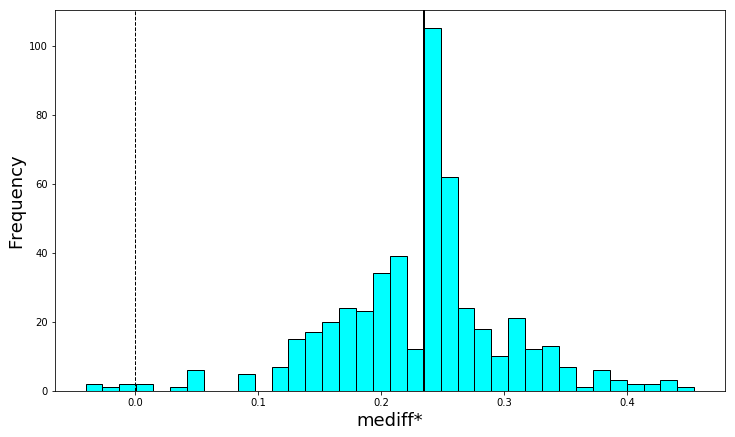

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.hist(bootvals, bins=36, color="cyan", edgecolor="k")
ax.axvline(mediff_est, c="k", linewidth=2)
ax.axvline(0, c="k", linestyle="--", linewidth=1)

ax.set_xlabel("mediff*", size=18)
ax.set_ylabel("Frequency", size=18);